### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [44]:
import matplotlib.pyplot as plt
import pandas as pd


In [45]:
# importa el tsv y guárdalo en un dataframe

df = pd.read_csv("data\drugLibTrain_raw.tsv", sep="\t", index_col=0)
df

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vipre\AppData\Local\Temp\ipykernel_2356\25759096.py:3: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("data\drugLibTrain_raw.tsv", sep="\t", index_col=0)


,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3107 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3089 non-null   object
 6   sideEffectsReview  3032 non-null   object
 7   commentsReview     3095 non-null   object
dtypes: int64(1), object(7)
memory usage: 218.5+ KB


In [47]:
df.describe(include='all')

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107,3107.000000,3107,3107,3106,3089,3032,3095
unique,502,NaN,5,5,1426,3031,2813,3046
top,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,63,NaN,1330,1019,236,20,112,6
mean,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [48]:
df_selected = df[['effectiveness', 'sideEffects']]

# Create dummy variables for the categorical columns
df_dummies = pd.get_dummies(df_selected, columns=['effectiveness', 'sideEffects'])

# Display the first few rows of the transformed dataframe
df_dummies.head()

,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
2202,False,True,False,False,False,False,True,False,False,False
3117,False,True,False,False,False,False,False,False,False,True
1146,False,True,False,False,False,False,False,False,True,False
3947,False,False,False,True,False,False,True,False,False,False
1951,False,False,False,True,False,False,False,False,False,True


In [49]:
df_dummies

,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
2202,False,True,False,False,False,False,True,False,False,False
3117,False,True,False,False,False,False,False,False,False,True
1146,False,True,False,False,False,False,False,False,True,False
3947,False,False,False,True,False,False,True,False,False,False
1951,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
1039,False,True,False,False,False,False,True,False,False,False
3281,False,False,True,False,False,True,False,False,False,False
1664,False,False,False,True,False,False,False,True,False,False
2621,True,False,False,False,False,False,True,False,False,False


In [50]:
# comprueba los valores únicos de 'effectiveness'

df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [51]:
# Creamos un diccionario para transformar esas strings en int

In [52]:
my_dict = {"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4}

In [53]:
df['effectiveness_int'] = df['effectiveness'].map(my_dict)

In [54]:
df.head(5)

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1


In [55]:
# comprueba los valores únicos de 'sideEffects'

df["sideEffects"].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [57]:
# crea el diccionario para sideeffects_int, como antes

sideeffects_dict = {
    'No Side Effects': 0,
    'Mild Side Effects': 1,
    'Moderate Side Effects': 2,
    'Severe Side Effects': 3,
    'Extremely Severe Side Effects': 4
}

# Apply the transformation to the 'sideEffects' column
df['sideEffects_int'] = df['sideEffects'].map(sideeffects_dict)

In [58]:
df.head(5)

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int,sideEffects_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,1
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4,3
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,0
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,3


,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int,sideEffects_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,1
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4,3
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,0
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,3
...,...,...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...",4,1
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,0,4
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---,1,2
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,3,1


In [59]:
# guarda en una variable df_model con solo las columnas 'rating','effectiveness_int','sideEffects_int'

df_model = df[['rating', 'effectiveness_int', 'sideEffects_int']]

df_model.head()

,rating,effectiveness_int,sideEffects_int
2202,4,4,1
3117,1,4,3
1146,10,4,0
3947,3,1,1
1951,2,1,3


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [60]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
# entrena y guarda modelos para k con valores entre 1 y 20 mediante un list comprehension usando un random_state=42

# O bueno un bucle, haz lo que te guste

In [62]:
# kmeans = KMeans(n_clusters= k, random_state=42)

silhouette_scores = []
kmeans_models = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_model)
    score = silhouette_score(df_model, kmeans.labels_)
    silhouette_scores.append(score)
    kmeans_models.append(kmeans)



In [63]:
kmeans_models

[KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42),
 KMeans(n_clusters=10, random_state=42),
 KMeans(n_clusters=11, random_state=42),
 KMeans(n_clusters=12, random_state=42),
 KMeans(n_clusters=13, random_state=42),
 KMeans(n_clusters=14, random_state=42),
 KMeans(n_clusters=15, random_state=42),
 KMeans(n_clusters=16, random_state=42),
 KMeans(n_clusters=17, random_state=42),
 KMeans(n_clusters=18, random_state=42),
 KMeans(n_clusters=19, random_state=42),
 KMeans(n_clusters=20, random_state=42)]

In [ ]:
# muestra la lista con los modelos entrenados
# El ocho es el valor por defecto por eso no aparece cuando lo ejecutas

[KMeans(n_clusters=1, random_state=42),
 KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42),
 KMeans(n_clusters=10, random_state=42),
 KMeans(n_clusters=11, random_state=42),
 KMeans(n_clusters=12, random_state=42),
 KMeans(n_clusters=13, random_state=42),
 KMeans(n_clusters=14, random_state=42),
 KMeans(n_clusters=15, random_state=42),
 KMeans(n_clusters=16, random_state=42),
 KMeans(n_clusters=17, random_state=42),
 KMeans(n_clusters=18, random_state=42),
 KMeans(n_clusters=19, random_state=42)]

In [64]:
# guarda los silhouette scores del modelo con list comprehension

silhouette_scores

[0.6190969508782411,
 0.4541665291694327,
 0.4174308457120984,
 0.40251749671242926,
 0.40776675491666886,
 0.36905083756127866,
 0.3887036746255966,
 0.4139468434587661,
 0.4140756969294152,
 0.4113585237343824,
 0.4330879478500931,
 0.4480935310335395,
 0.45681771570543733,
 0.45541882505953524,
 0.4553688149401538,
 0.45265363970485795,
 0.4587477111014458,
 0.45908299832568217,
 0.46525158235955]

[0.6190969508782411,
 0.4541665291694327,
 0.4164004027525524,
 0.41328351677571,
 0.40816039595648446,
 0.3832554267400715,
 0.39979306381521584,
 0.40298803411433165,
 0.4074591270479905,
 0.40452622286502343,
 0.43242097720150596,
 0.4438692789622941,
 0.43936887397001534,
 0.47016152457339827,
 0.4892090560909278,
 0.47973875582321385,
 0.4633767866983995,
 0.49837117806608283]

In [65]:
# comprueba la longitud de los silhouette scores

len(silhouette_scores)

19

18

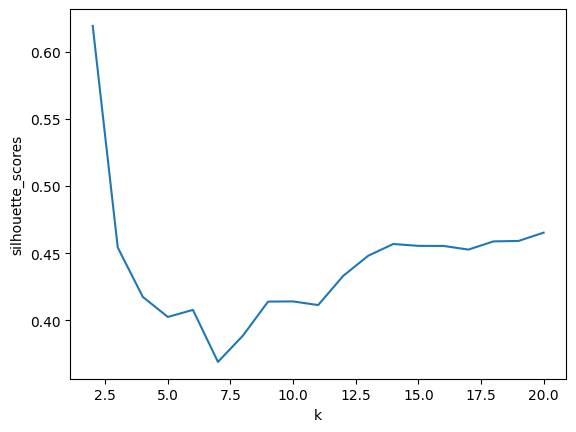

In [67]:
plt.plot(range(2,21), silhouette_scores)
plt.xlabel('k')
plt.ylabel('silhouette_scores')
plt.show()

Mayor silhouette scores con K=2

In [ ]:
# guarda las inercias del model con un list comprehension

In [71]:
inercias = [KMeans(n_clusters=k, random_state=42).fit(df_model).inertia_ for k in range(1, 21)]

inercias

[35812.368200836754,
 11137.73672363931,
 7254.022835331672,
 5699.9216192319545,
 5121.903116699243,
 4234.666975562969,
 3877.103263890109,
 3345.210728306227,
 2981.352790912983,
 2768.5113418303267,
 2643.8714392997135,
 2479.495179351473,
 2306.733107152373,
 2230.1052023009092,
 2097.8634940170523,
 2003.8422982704428,
 1928.2413032044226,
 1816.408058972198,
 1762.118968691801,
 1691.6786905802874]

[35812.3682008368,
 11137.736723639344,
 7254.022835331666,
 5691.624714323987,
 4805.423332643921,
 4233.709967967664,
 3775.656021891465,
 3312.1846473093838,
 2984.567361368435,
 2841.8155485330253,
 2612.052327151954,
 2412.0829271158,
 2268.5109140505783,
 2155.6868408166806,
 2029.3145660247746,
 1933.1812127609683,
 1849.004377871369,
 1788.8727950596997,
 1695.3879260828553]

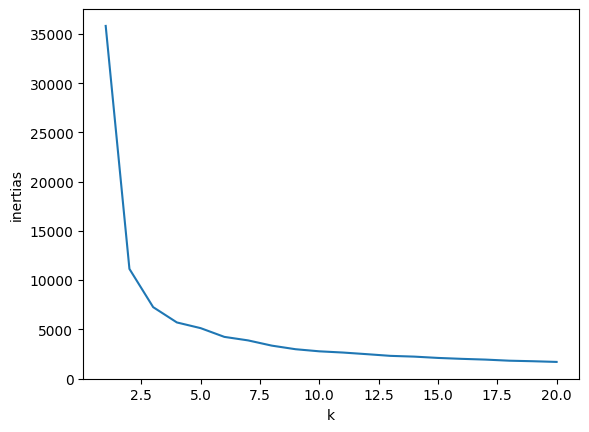

In [73]:
plt.plot(range(1,21), inercias)
plt.xlabel('k')
plt.ylabel('inertias')
plt.show()

Con el Elbow method comprobamos que k=2 sería la opción más adecuada

In [76]:
# instancia un nuevo KMeans con n_clusters=2 y random_state=42

# entrena el modelo

# comprueba los labels_


kmeans_2_sample = KMeans(n_clusters=2, random_state=42)

kmeans_2_sample.fit(df_model)

labels_2_sample = kmeans_2_sample.labels_

labels_2_sample[:] 

array([1, 1, 0, ..., 1, 0, 1])

array([0, 0, 1, ..., 0, 1, 0])

#### Muestra en un gráfico de tartas la distribución de los distintos clusters

In [80]:
# crea un dataframe .labels_ del modelo anterior

df_clusters = pd.DataFrame(labels_2_sample, columns=['Cluster'])
df_clusters.head()

,Cluster
0,1
1,1
2,0
3,1
4,1


<Axes: ylabel='count'>

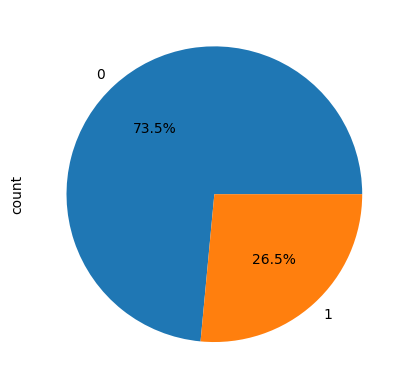

In [81]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")

,Cluster
0,0
1,0
2,1
3,0
4,0


In [ ]:
# El favorito de Joselu




<AxesSubplot:ylabel='Cluster'>

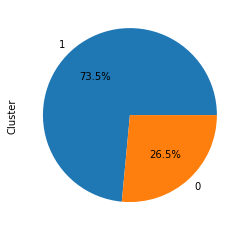

In [49]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")